# Exploratory data analysis
In the following, I will start looking at the different features in the data set. 
% explain this more as you develop.
This is either a classification or ordinal regression problem. We will try both approaches and compare. 

First hypothesis: A key predictor of building damage will be the materials it is built from. 
Second hypothesis: A key predictor of building damage will be the proximity to the epicentre of the quake, though this may be hard to test, need to verify if there is any data available for this purpose. 


In [1]:
# import libraries 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd 


# import training data 
path_to_train="/Users/luke_dev/Documents/data_science_projects/Richter_Predictor_Modeling_Earthquake_Damage/data/train_values.csv"
path_to_train_labels="/Users/luke_dev/Documents/data_science_projects/Richter_Predictor_Modeling_Earthquake_Damage/data/train_labels.csv"
train_data_raw=pd.read_csv(path_to_train)
train_data_labels=pd.read_csv(path_to_train_labels) # true results of damage grading 
train_data_raw.head(50)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0
5,333020,8,558,6089,2,10,9,5,t,r,...,1,0,0,0,0,0,0,0,0,0
6,728451,9,475,12066,2,25,3,4,n,r,...,0,0,0,0,0,0,0,0,0,0
7,475515,20,323,12236,2,0,8,6,t,w,...,0,0,0,0,0,0,0,0,0,0
8,441126,0,757,7219,2,15,8,6,t,r,...,0,0,0,0,0,0,0,0,0,0
9,989500,26,886,994,1,0,13,4,t,i,...,0,0,0,0,0,0,0,0,0,0


In [2]:
# data cleaning 
# checking for missing values in each feature 
train_data_raw.isnull().sum() # check by feature 

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [3]:
# data cleaning 
train_data_raw.isnull().sum().sum() # check for whole data set 


0

In [4]:
# data cleaning 
train_data_labels.isnull().sum() # check label results 

building_id     0
damage_grade    0
dtype: int64

Text(0, 0.5, 'building material')

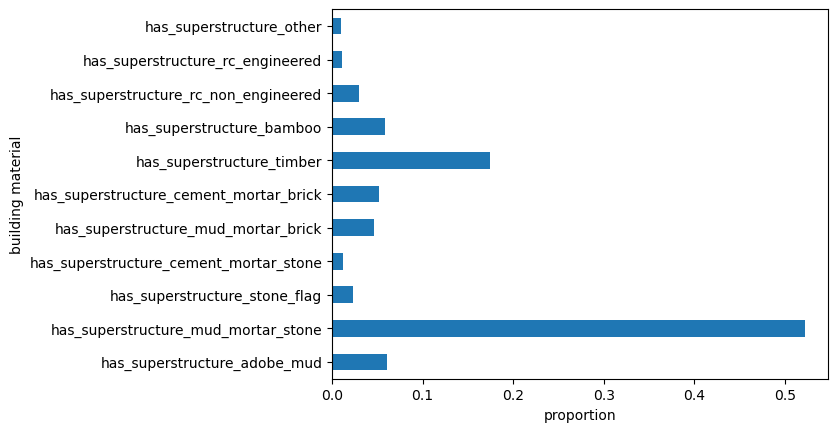

In [5]:
# group together all possible building strcutures 
building_struct_features=train_data_raw.loc[:,['has_superstructure' in i for i in train_data_raw.columns]]
counts_of_each_struct= building_struct_features.sum()/building_struct_features.sum().sum() # normalised proportions of each strcutre 

# bar chart of relative proportions of each building material 
ax=counts_of_each_struct.plot.barh(building_struct_features.columns,counts_of_each_struct)
ax.set_xlabel("proportion")
ax.set_ylabel("building material")


Text(0, 0.5, 'Secondary use')

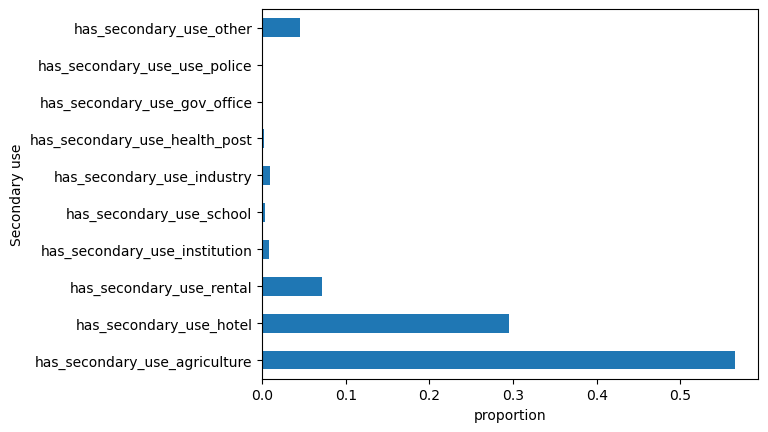

In [6]:
# grouping together all secondary uses
secondary_use_features=train_data_raw.loc[:,['has_secondary_use_' in i for i in train_data_raw.columns]]
counts_of_each_secondary_use= secondary_use_features.sum()/secondary_use_features.sum().sum()
# bar chart of relative proportions of each building material 
ax=counts_of_each_secondary_use.plot.barh(secondary_use_features.columns,counts_of_each_secondary_use)
ax.set_xlabel("proportion")
ax.set_ylabel("Secondary use")

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


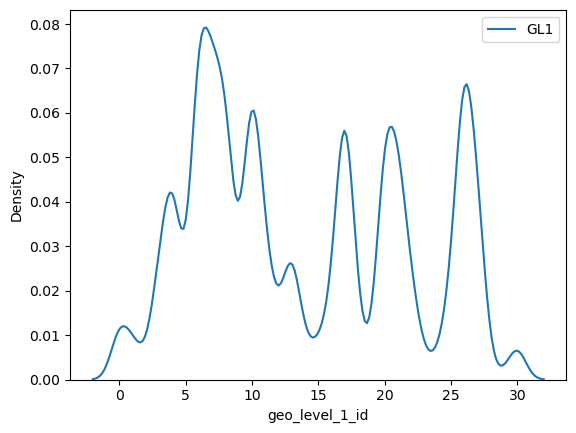

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


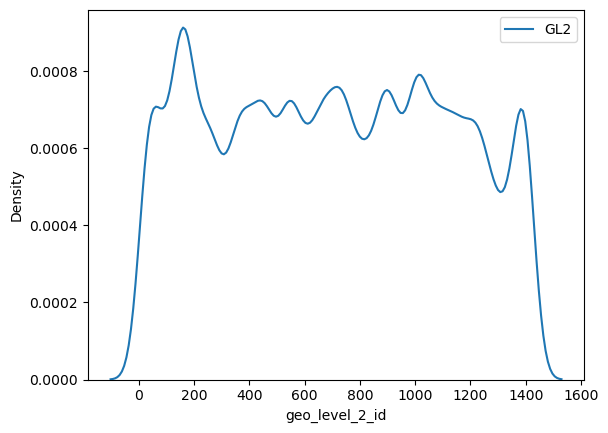

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


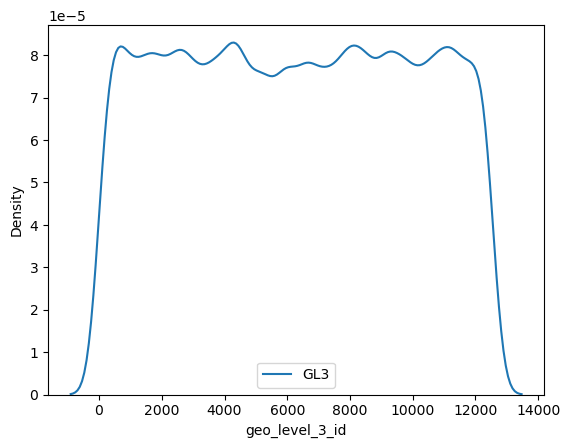

In [7]:
# looks at some distributions of the geographic levels
geo_lvl_1=train_data_raw['geo_level_1_id']
geo_lvl_2=train_data_raw['geo_level_2_id']
geo_lvl_3=train_data_raw['geo_level_3_id']

sns.kdeplot(geo_lvl_1,label="GL1")
plt.legend()
plt.show()
sns.kdeplot(geo_lvl_2,label="GL2")
plt.legend()
plt.show()
sns.kdeplot(geo_lvl_3,label="GL3")
plt.legend()
plt.show()




0.8432469560746121
0.8432469560746122
0.8432469560746121


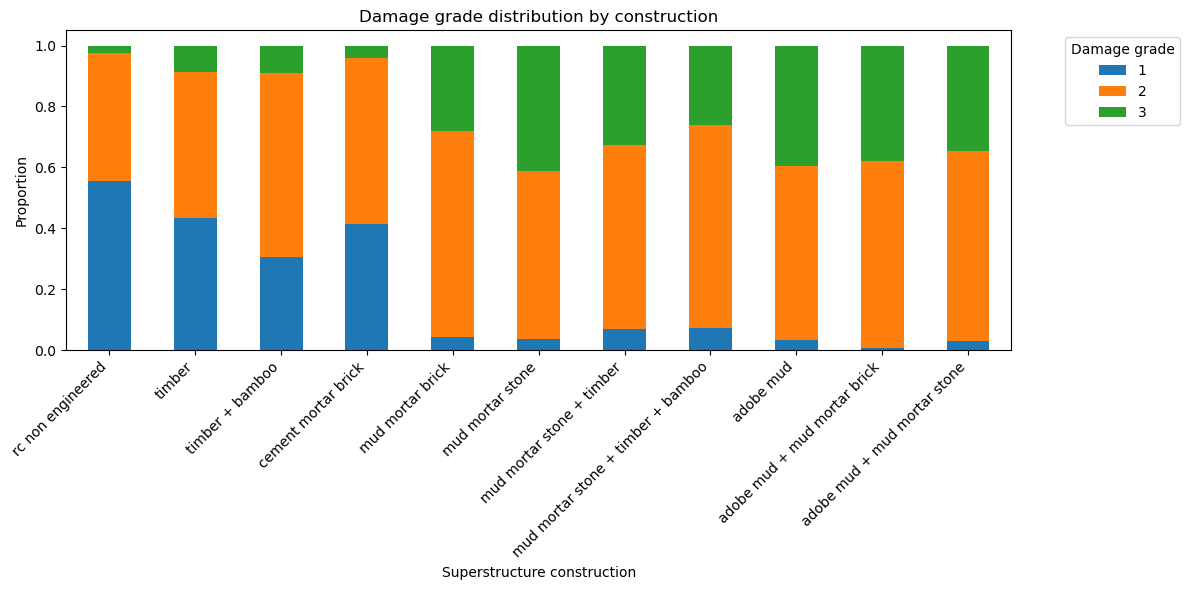

In [8]:


# think we want to look at the building stuctural features vs damage 
struct_vs_damage=pd.concat([building_struct_features,train_data_labels['damage_grade']],axis=1)
# get the set of unique building constructions 
unique_constructions=building_struct_features.value_counts(normalize=True)
# # now will only consider unique building constructions accoutn for at least 1% of the proportion at each damage level,
# # other building constructions are outliers, not enough data to learn anything meaningful
un_con_cleaned=unique_constructions[unique_constructions>=0.01]
print(un_con_cleaned.sum()) # want to check I've captured a good amount of the data with 1% tolerance
common_constructions = un_con_cleaned.index


# now want to gather all the damage data for each construction 

# structural columns (all columns except the label)
struct_cols = building_struct_features.columns.tolist()

# build a MultiIndex for each row based on the structural features
row_index = struct_vs_damage.set_index(struct_cols).index

# keep only rows whose structural tuple is in the common constructions
mask = row_index.isin(common_constructions)

cleaned_struct_vs_damage = struct_vs_damage.loc[mask].copy()

print(mask.mean())            # fraction of rows kept
print(un_con_cleaned.sum())   # should be ~ same

# so we now have 11 clear structures to work with that account for 84% of the data
# going to ignore the other features for now, we will see what the common constructions can tell us about the damage levels

# counts per (construction, damage_grade)
damage_by_construction = (
    cleaned_struct_vs_damage
    .set_index(struct_cols)
    .groupby(level=list(range(len(struct_cols))))["damage_grade"]
    .value_counts()
)

#Reshape into a table suitable for plotting
damage_counts = (
    damage_by_construction
    .unstack(fill_value=0)   # columns = damage_grade
)
# Convert counts → proportions
damage_props = damage_counts.div(damage_counts.sum(axis=1), axis=0)
# santity check 
damage_props.sum(axis=1)


def onehot_tuple_to_label(tup, cols, prefix="has_superstructure_"):
    active = [c for c, v in zip(cols, tup) if int(v) == 1]
    if not active:
        return "None"
    # strip prefix and prettify
    pretty = [a.replace(prefix, "").replace("_", " ") for a in active]
    return " + ".join(pretty)  # if multiple flags are 1, show them combined

damage_props_named = damage_props.copy()

damage_props_named.index = [
    onehot_tuple_to_label(tup, struct_cols)
    for tup in damage_props_named.index
]

ax = damage_props_named.plot(kind="bar", stacked=True, figsize=(12,6))
ax.set_xlabel("Superstructure construction")
ax.set_ylabel("Proportion")
ax.set_title("Damage grade distribution by construction")
ax.legend(title="Damage grade", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.xticks(rotation=45, ha="right")
plt.tight_layout()


In [14]:
# now going to train a KNN classifier on the construction data to predict damage 
from sklearn.metrics import accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier

X = building_struct_features.values   # shape: (n_samples, n_flags)
y = train_data_labels["damage_grade"].values

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



knn = KNeighborsClassifier(
    n_neighbors=10000,
    metric="manhattan",   # key choice
    weights="distance"    # closer neighbours matter more
)

knn.fit(X_train, y_train)



y_pred = knn.predict(X_val)

acc = accuracy_score(y_val, y_pred)
f1  = f1_score(y_val, y_pred, average="micro")

acc, f1





(0.5801308493697358, 0.5801308493697358)